In [48]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [49]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


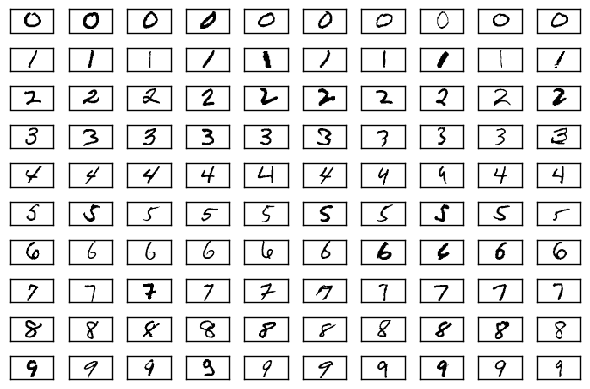

In [234]:
def P1(num_examples=10):

### STUDENT START ###
    fig, axis = plt.subplots(nrows=10, ncols=10, sharex=True,sharey=True,)
    axis = axis.flatten()
    imgnum = 0
    for i in range(10):
        for j in range(10):
            #reshape data
            img = mini_train_data[mini_train_labels == i][j].reshape(28, 28)
            axis[imgnum].imshow(img, cmap='Greys', interpolation='nearest')
            imgnum+= 1
            
    #setting up axes        
    axis[0].set_xticks([])
    axis[0].set_yticks([])
    plt.tight_layout()
    
    #visualize the plot
    plt.show()


### STUDENT END ###

P1(10)

Question #2

In [45]:
def P2(k_values):

### STUDENT START ###

    #for loop for each value of k
    for k in k_values:
        
        #setting up, fitting, and predicting KNeighbors model
        KNNC = KNeighborsClassifier(n_neighbors=k, weights="uniform")
        KNNC.fit(mini_train_data, mini_train_labels)
        predknn = KNNC.predict(dev_data)

        #calculating accuracy
        correct, total = 0, 0
        for pred, label in zip(predknn, dev_labels):
            if pred == label: correct += 1
            total += 1
            
        print 'When k = %3d  total: %3d  correct: %3d  accuracy: %3.2f' %(k, total, correct, 1.0*correct/total)
    
    
    #for k = 1:
    KNNC_1 = KNeighborsClassifier(n_neighbors = 1, weights="uniform")
    KNNC_1.fit(mini_train_data, mini_train_labels)
    predknn_1 = KNNC_1.predict(dev_data)
        
    y_true = dev_labels             
    y_pred = predknn_1
    print "\n"
    print("For K = 1")

    #classification report prints out precision, recall, f1-score, and support
    print (classification_report(y_true, y_pred))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


When k =   1  total: 1000  correct: 888  accuracy: 0.89
When k =   3  total: 1000  correct: 878  accuracy: 0.88
When k =   5  total: 1000  correct: 869  accuracy: 0.87
When k =   7  total: 1000  correct: 865  accuracy: 0.86
When k =   9  total: 1000  correct: 863  accuracy: 0.86


For K = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



Answer: For k=1, the most difficult digit is 9, with the lowest f1-score of 0.80.

Note to self:

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

(1) precision = "ability of the classifier not to label as positive a sample that is negative"

(2) recall = "in information retrieval is the fraction of the documents that are relevant to the query that are successfully retrieved"

(3) f1-score =  "can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal"

In [51]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    #for loop to account of all the training sizes
    for size in train_sizes:
        starttime = time.time()
        KNNC = KNeighborsClassifier(n_neighbors=1, weights="uniform")
        KNNC.fit(train_data[:size], train_labels[:size])
        predknn = KNNC.predict(dev_data)
        correct, total = 0, 0
        for pred, label in zip(predknn, dev_labels):
            if pred == label: correct += 1
            total += 1
        
        #noting end time and calculating time taken
        endtime = time.time()
        timetaken = endtime-starttime
        print 'When size = %3d  , correct: %3d  accuracy: %3.2f, time taken: %3.2f seconds' %(size, correct, 1.0*correct/total, timetaken)
        accuracies.append(float(1.0*correct/total))
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

When size = 100  , correct: 720  accuracy: 0.72, time taken: 0.14 seconds
When size = 200  , correct: 786  accuracy: 0.79, time taken: 0.25 seconds
When size = 400  , correct: 841  accuracy: 0.84, time taken: 0.49 seconds
When size = 800  , correct: 884  accuracy: 0.88, time taken: 1.14 seconds
When size = 1600  , correct: 902  accuracy: 0.90, time taken: 2.09 seconds
When size = 3200  , correct: 926  accuracy: 0.93, time taken: 3.97 seconds
When size = 6400  , correct: 937  accuracy: 0.94, time taken: 8.69 seconds
When size = 12800  , correct: 959  accuracy: 0.96, time taken: 17.14 seconds
When size = 25000  , correct: 970  accuracy: 0.97, time taken: 44.01 seconds


In [57]:
def P4():

### STUDENT START ###

    lr = LinearRegression(fit_intercept=True)
    sizes = np.array(train_sizes).reshape(9,1)
    
    #fit takes input matrix X and output vector Y
    #So each input example in X is a vector, even if it contains only a single value.
    
    regline = lr.fit(sizes, accuracies)
    #regline_log = lr.fit(np.math.log10(sizes), np.math.log10(accuracies))
    
    print 'Estimated function: y = %.2f + %.2fx' %(regline.intercept_, regline.coef_[0])
    
    
    n_6 = regline.predict(60000)
    print 'Regression model predicts an accuracy of %2f for n = 60000' %(n_6)
    
### STUDENT END ###

P4()

Estimated function: y = 0.84 + 0.00x
Regression model predicts an accuracy of 1.243072 for n = 60000


ANSWER:

A linear regression is not the right way to go because the function is way off (coefficient of 0, and an unreasonable accuracy of 1.24).


In [125]:
def P5():
    
### STUDENT START ###
    
    #setting up, fitting, and predicting KNeighbors model
    KNNC = KNeighborsClassifier(n_neighbors=1, weights="uniform")
    KNNC.fit(mini_train_data, mini_train_labels)
    pred_labels = KNNC.predict(dev_data)
    
    #confusion matrix print out
    print(confusion_matrix(dev_labels, pred_labels))
    
### STUDENT END ###

P5()

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


ANSWER

It seems that the most confused pair of digits are 4 and 9 because according to the confusion matrix, 14 numbers were incorrectly classified as 9's when they were actually 4's. That was the highest ratio of incorrect predictions in the matrix.

Note to self: 
    "confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes."

y axis = true value, the number in question
x axis = predicted value (what that number was predicted to be, correctly or incorrectly)

In [31]:
def P6():

### STUDENT START ###
        
    mini_train_data_blur = mini_train_data
    dev_data_blur = dev_data
        
    def gaussian_blur(imglst):

        
       img_dim = int(math.sqrt(len(imglst)))
       img = np.array(imglst).reshape(img_dim, img_dim)
        
       blurimg = [[0 for x in range(img_dim)] for y in range(img_dim)]
       weights = [[0.0453542, 0.0566406, 0.0453542],
                  [0.0566406, 0.0707355, 0.0566406],
                  [0.0453542, 0.0566406, 0.0453542]]
       matwt = np.array(weights)
       matwt = matwt.reshape(3,3)
       totw = sum(sum(wt) for wt in weights)
       for row in range(img_dim-1):
           for col in range(img_dim-1):
               wtrow = wtcol = 1
               if row > 0 and col > 0 and row < img_dim and col < img_dim:
                   blurimg[row][col] =   (img[row][col]*matwt[wtrow][wtcol]
                                       + img[row-1][col-1]*matwt[wtrow-1][wtcol-1]
                                       + img[row-1][col]*matwt[wtrow-1][wtcol]
                                       + img[row-1][col+1]*matwt[wtrow-1][wtcol+1]
                                       + img[row][col-1]*matwt[wtrow][wtcol-1] + img[row][col+1]*matwt[wtrow][wtcol+1]
                                       + img[row+1][col-1]*matwt[wtrow+1][wtcol-1]
                                       + img[row+1][col]*matwt[wtrow+1][wtcol]
                                       + img[row+1][col+1]*matwt[wtrow+1][wtcol+1])/totw
               elif row == img_dim and col < img_dim and col > 0:
                   blurimg[row][col] =   (img[row][col]*matwt[wtrow][wtcol]
                                       + img[row-1][col-1]*matwt[wtrow-1][wtcol-1]  
                                       + img[row-1][col]*matwt[wtrow-1][wtcol]
                                       + img[row-1][col+1]*matwt[wtrow-1][wtcol+1]
                                       + img[row][col-1]*matwt[wtrow][wtcol-1]  
                                       + img[row][col+1]*matwt[wtrow][wtcol+1])/totw
               elif row < img_dim and row > 0 and col == img_dim:
                   blurimg[row][col] =   (img[row][col]*matwt[wtrow][wtcol]
                                        + img[row-1][col-1]*matwt[wtrow-1][wtcol-1]
                                        + img[row-1][col]*matwt[wtrow-1][wtcol]
                                        + img[row][col-1]*matwt[wtrow][wtcol-1]
                                        + img[row+1][col-1]*matwt[wtrow+1][wtcol-1]
                                        + img[row+1][col]*matwt[wtrow+1][wtcol])/totw
               elif row == img_dim and col == img_dim:
                   blurimg[row][col] =   (img[row][col]*matwt[wtrow][wtcol]
                                       + img[row-1][col-1]*matwt[wtrow-1][wtcol-1]
                                       + img[row-1][col]*matwt[wtrow-1][wtcol]
                                       + img[row][col-1]*matwt[wtrow][wtcol-1] )/totw
               else:
                   blurimg[row][col] = ( img[row][col]*matwt[wtrow][wtcol]
                                       + img[row][col+1]*matwt[wtrow][wtcol+1]
                                       + img[row+1][col]*matwt[wtrow+1][wtcol]
                                       + img[row+1][col+1]*matwt[wtrow+1][wtcol+1])/totw

       return sum(blurimg, [])


    ##create a new function, pass in the values to create blurred mini data set!
    
    def create_mini_train_blur():
        mini_train_data_blur = mini_train_data
        for i in len(mini_train_data):
            for j in len(mini_train_data[0]):
                mini_train_data_blur[i][j] = gaussian_blur(mini_train_data[i][j])
    
    return mini_train_data_blur
    
   
    ##create a new function, pass in the values to create blurred dev data set!
    
    def create_dev_blur():
        dev_data_blur = dev_data
        for i in len(dev_data):
            for j in len(dev_data[0]):
                dev_data_blur[i][j] = gaussian_blur(dev_data[i][j])
    
    return dev_data_blur

    ########################################################
    
    #CASE 1:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(mini_train_data_blur, mini_train_labels)
    predknn_case1 = KNNC.predict(dev_data)
    
    correct, total = 0, 0
    for pred, label in zip(predknn_case1, dev_labels):
        if pred == label: correct += 1
        total += 1

    print 'When k = %3d  total: %3d  correct: %3d  accuracy: %3.2f' %(k, total, correct, 1.0*correct/total)

    
    #CASE 2:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(mini_train_data, mini_train_labels)
    predknn_case2 = KNNC.predict(dev_data_blur)
    
    correct, total = 0, 0
    for pred, label in zip(predknn_case2, dev_labels):
        if pred == label: correct += 1
        total += 1

    print 'When k = %3d  total: %3d  correct: %3d  accuracy: %3.2f' %(k, total, correct, 1.0*correct/total)

    
    #CASE 3:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(mini_train_data_blur, mini_train_labels)
    predknn = KNNC.predict(dev_data_blur)
    
    correct, total = 0, 0
    for pred, label in zip(predknn_case3, dev_labels):
        if pred == label: correct += 1
        total += 1

    print 'When k = %3d  total: %3d  correct: %3d  accuracy: %3.2f' %(k, total, correct, 1.0*correct/total)

    
### STUDENT END ###
    
P6()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

bernoulli accuracy: 0.82
multinomial accuracy: 0.81




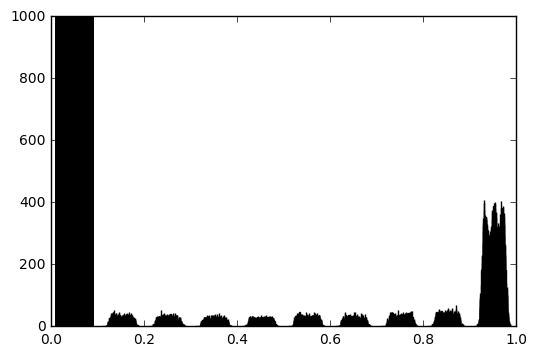

In [59]:
def P7():

### STUDENT START ###
    
    #chossing bin value of 0.5
    bern = BernoulliNB(binarize=0.5, alpha = .001)
    bern.fit(mini_train_data, mini_train_labels)

    
    #bin values for digitizing for multinomial naive bayes
    bins = np.array([0.0, 0.33, 0.67, 1.0])
    
     
    #the function digitize converts to 0,1,2
    dig_mini_train_data = np.digitize(mini_train_data, bins)
    dig_dev_data = np.digitize(dev_data, bins)
    
    
    mult = MultinomialNB(alpha = 1)
    # floor converts data into a discrete-like set
    mult.fit(dig_mini_train_data, mini_train_labels) 
    mult_score = mult.score(dig_dev_data, dev_labels) 
    
  
    print 'bernoulli accuracy: %3.2f' %bern.score(dev_data, dev_labels)
    print 'multinomial accuracy: %3.2f' %mult_score
    
    print '\n'
    plt.hist(dev_data)
    
### STUDENT END ###

P7()

The mult-class version does not seem to improve the results, but I would not expect it to. We can see that the data is actually divided predominantly into 2 main peaks (2 sets), so a multi-class separation wouldn't necessarily improve accuracy over a binary distribution since the nature of the data is relatively divided in 2.

In [39]:
def P8(alphas):

### STUDENT START ###

    with np.errstate(divide = 'ignore'):
        
       #paramter set from array passed in 
       parameters = [alphas]
       #Initialize GridSeach with Bernoulli Naive Bayes
    
       #setting up GridSearch with Bernoulli function with the array of paramaters to test 
       gsnb = GridSearchCV(BernoulliNB(), parameters)
       gsnb.fit(mini_train_data,mini_train_labels) # running the grid search
       print("\nScores for alphas:")
       print(gsnb.grid_scores_)
       print ("\nThe best estimator is %s" % gsnb.best_estimator_)
       print ("\nThe best score is %s" % gsnb.best_score_)
       print ("\nThe best parameter is %s" % gsnb.best_params_)
    
    
    #explicitly testing alpha of 0.0 to record its accuracy
    gsnb_0 = BernoulliNB(alpha=0.0)
    gsnb_0.fit(mini_train_data, mini_train_labels)
    print ("\n The accuracy when alpha is 0.0 is: %3.2f") %gsnb.score(dev_data, dev_labels)
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)




Scores for alphas:
[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02305, params: {'alpha': 0.001}, mean: 0.82000, std: 0.02607, params: {'alpha': 0.01}, mean: 0.82100, std: 0.02454, params: {'alpha': 0.1}, mean: 0.81900, std: 0.02147, params: {'alpha': 0.5}, mean: 0.81200, std: 0.01814, params: {'alpha': 1.0}, mean: 0.81000, std: 0.01767, params: {'alpha': 2.0}, mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}]

The best estimator is BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

The best score is 0.821

The best parameter is {'alpha': 0.1}

 The accuracy when alpha is 0.0 is: 0.82


ANSWER:

When alpha is 0.0, the accuracy is 0.82. This was not what I was expecting because the alpha value gives a probability to the other events (unaccounted events in your sample set), but setting this alpha value to 0 would disregard them completely making the accuracy of the set up and thus the prediction accuracy much lower. In this case, it's lower but barely - I did not expect it to be as high or close to the accuracy of a nonzero alpha value.

Notes to myself about naive bayes, alpha, grid search:

the alpha parameter is what is known as a hyperparameter; i.e. a parameter that controls the form of the model itself. In most cases, the best way to determine optimal values for hyperparameters is through a grid search over possible parameter values, using cross validation to evaluate the performance of the model on your data at each value. Read the above links for details on how to do this with scikit-learn

Notes to myself about naive bayes, laplace
https://inst.eecs.berkeley.edu/~cs188/sp12/slides/cs188%20lecture%2020%20--%20naive%20bayes%206PP.pdf

In [12]:
def P9():

### STUDENT START ###

    #setting up gaussian naive bayes model
    gau = GaussianNB()
    pred = gau.fit(mini_train_data, mini_train_labels)
     
    print 'The original gaussian accuracy: %3.2f while the accuracy for BernoulliNB %3.2f' % (gau.score(dev_data, dev_labels), 0.82)
    
   
    print "\n The current values of theta(mean) are:"
    print gau.theta_
    print "\nThe current values of sigma(variance) are:"
    print gau.sigma_
    
   
    #reassign sigma to 1, normal standard deviation
    print "\nLet's change sigma(variance) to 1 and see what happens"
    gau.sigma_.fill(1)
    
    print 'The NEW Gaussian accuracy: %3.2f is closer to the accuracy of the BernoulliNB %3.2f' % (gau.score(dev_data, dev_labels), 0.82)
    
    
### STUDENT END ###



gnb = P9()

The original gaussian accuracy: 0.62 while the accuracy for BernoulliNB 0.82

 The current values of theta(mean) are:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

The current values of sigma(variance) are:
[[  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 ..., 
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e

ANSWER:

In a standard normal distribution, the mean is 0 and the standard deviation is set to 1, so reassigning that value to sigma while keeping theta as is,0) helped improve the accuracy of the GaussianNB prediction.

Notes to myself:
    
theta = mean

sigma = variance

http://stackoverflow.com/questions/27122757/sklearn-set-params-takes-exactly-1-argument/29028601
    

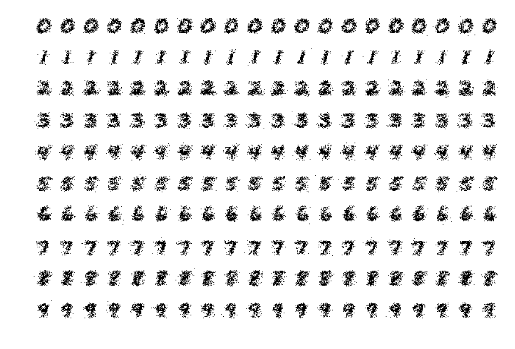

In [64]:
def P10(num_examples):
    
### STUDENT START ###    

    bern = BernoulliNB(alpha = .1)
    bern_fit = bern.fit(mini_train_data, mini_train_labels)
    bern_predict = bern.predict(dev_data)
    
    for i in xrange(10):
        for j in xrange(num_examples):
            matrix = np.exp(bern_fit.feature_log_prob_[i])
            for k,pix in enumerate(matrix):
                n = np.random.rand()
                if pix>n:
                    matrix[k] = 1
                else:
                    matrix[k] = 0
                    
            axis = plt.subplot(10,20,i*20+j+1)
            off = axis.set_axis_off()
            p = plt.imshow(matrix.reshape(28,28), cmap='gray_r')
    
    
### STUDENT END ###
    
P10 (20)

The biggest difference I see in these generated digits compared to the training digits is that these generated digits, though blurry, tend to be more uniform with each other (ex: all the 1's look like each other, all the 2's look like each other). The training data is more clear and defined in the major and nuanced difference between the multiple versions of each digit. This would make inituitve sense because the bernoulli model essentially only creates 2 options consistently across all pixels of all digits, and thus creates a more uniform image for each digit. However the training data on it's own has so many differences that we must account for these nuances in trying to classify each image as a particular digit.

In [97]:
def P11(buckets, correct, total):
    
### STUDENT START ###
   
    #setting up, fitting, and predicting KNeighbors model
    bern = BernoulliNB(alpha = .1)
    bern_fit = bern.fit(mini_train_data, mini_train_labels)
    bern_predict = bern.predict(dev_data)
    
    bernoulli_prob = bern.predict_proba(dev_data) 
    bp = np.amax(bernoulli_prob, axis=1)
    bucket = np.digitize(bp, buckets)
    
    #printing the bucket array to see what exactly it contains once its populated
        #print bucket
    
    #tallying up the number of digits recognized correctly vs the total to determine accuracy
    for i in range(len(bucket)):
        if bern_predict[i] == dev_labels[i]:
            correct[bucket[i]-1] = 1 + correct[bucket[i]-1]
        total[bucket[i]-1] = 1 + total[bucket[i]-1]

### STUDENT END ###

#the following was to ensure that the correct and total array were populated
    #print correct
    #print '\n'
    #print total
    #print '\n'

#probabilities of correct model
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]

correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9000000000000    total =  71    accuracy = 0.493
p(pred) <= 0.9990000000000    total =  53    accuracy = 0.434
p(pred) <= 0.9999900000000    total =  64    accuracy = 0.609
p(pred) <= 0.9999999000000    total =  46    accuracy = 0.543
p(pred) <= 0.9999999990000    total =  52    accuracy = 0.808
p(pred) <= 0.9999999999900    total =  49    accuracy = 0.796
p(pred) <= 0.9999999999999    total =  18    accuracy = 0.722
p(pred) <= 1.0000000000000    total = 616    accuracy = 0.955


From the prediction power buckets and the accuracies calculation, I can see that as we are more confident in our Naive Bayes model, the greater the accuracy. The accuracy values show an upward trend as the prediction values (our bucket interval values) increase.